<a href="https://colab.research.google.com/github/moazmohamed3214/assingment3/blob/main/naiveand%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [35]:
df=pd.read_csv("BankChurners.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [36]:
df.shape

(10127, 23)

In [37]:
df.size

232921

In [38]:
cols_to_use = ["Attrition_Flag","Customer_Age","Gender","Dependent_count","Education_Level","Marital_Status","Income_Category","Card_Category","Credit_Limit"]
df = df[cols_to_use]
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,12691.0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,8256.0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,3418.0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,3313.0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,4716.0
...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,4003.0
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,4277.0
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,5409.0
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,5281.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attrition_Flag   10127 non-null  object 
 1   Customer_Age     10127 non-null  int64  
 2   Gender           10127 non-null  object 
 3   Dependent_count  10127 non-null  int64  
 4   Education_Level  10127 non-null  object 
 5   Marital_Status   10127 non-null  object 
 6   Income_Category  10127 non-null  object 
 7   Card_Category    10127 non-null  object 
 8   Credit_Limit     10127 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 712.2+ KB


In [40]:
df.describe()

,Customer_Age,Dependent_count,Credit_Limit
count,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,8631.953698
std,8.016814,1.298908,9088.776650
min,26.000000,0.000000,1438.300000
25%,41.000000,1.000000,2555.000000
50%,46.000000,2.000000,4549.000000
75%,52.000000,3.000000,11067.500000
max,73.000000,5.000000,34516.000000


In [41]:
df.duplicated().sum()

30

In [42]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [43]:
df.shape

(10097, 9)

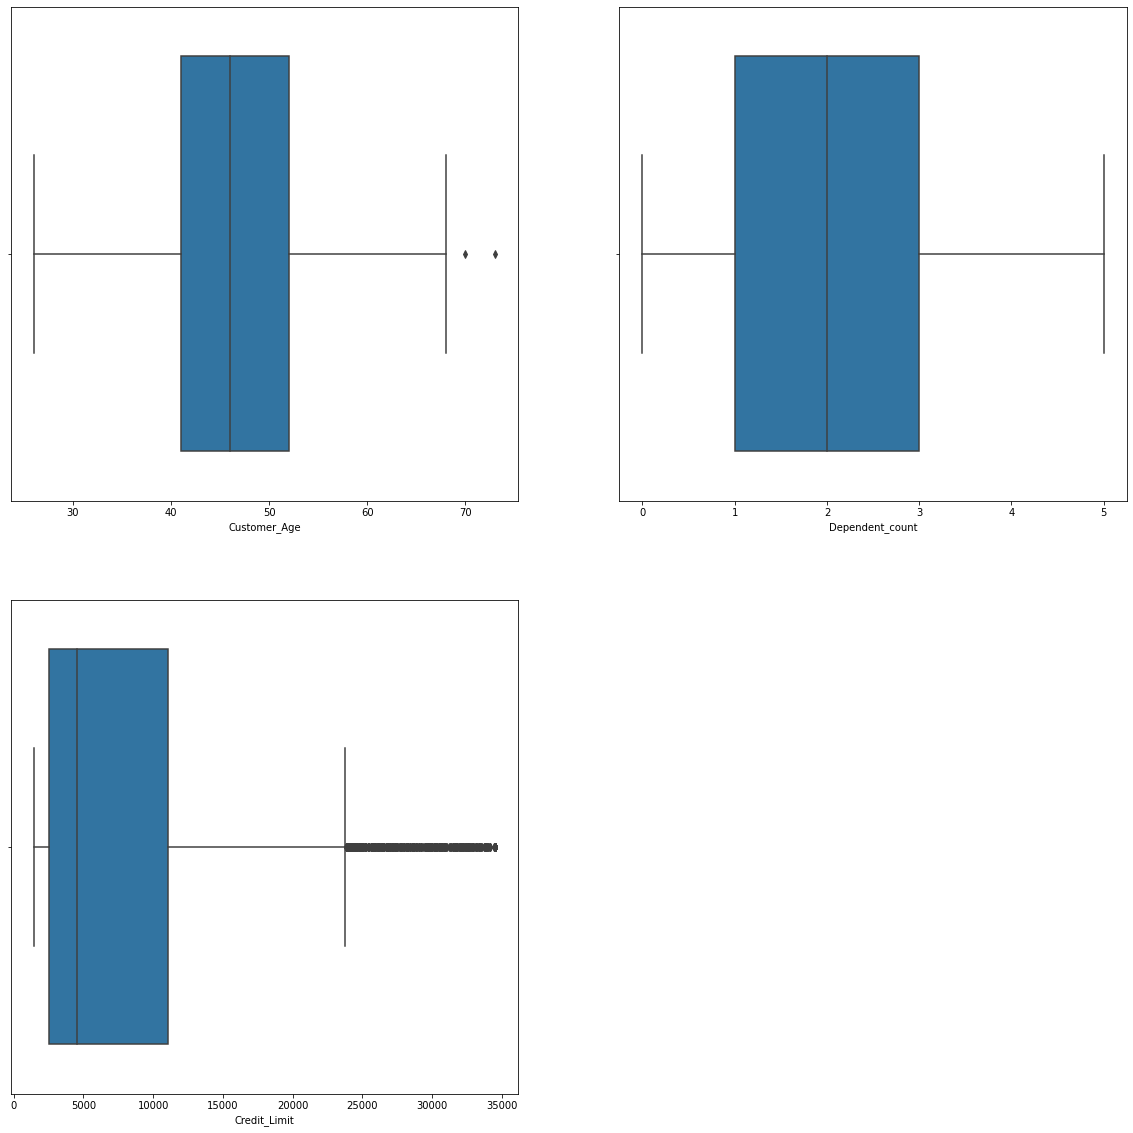

In [44]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(df["Customer_Age"])
plt.subplot(2,2,2)
sns.boxplot(df["Dependent_count"])
plt.subplot(2,2,3)
sns.boxplot(df["Credit_Limit"])
plt.show()

In [54]:
le=LabelEncoder()
df["Attrition_Flag"]=le.fit_transform(df["Attrition_Flag"])
df["Gender"]=le.fit_transform(df["Gender"])
ohe=pd.get_dummies(df,columns=["Education_Level","Marital_Status","Income_Category","Card_Category"])
ohe

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Credit_Limit,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,1,3,12691.0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,1,49,0,5,8256.0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1,51,1,3,3418.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,40,0,4,3313.0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,1,40,1,3,4716.0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,4003.0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
10123,0,41,1,2,4277.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
10124,0,44,0,1,5409.0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
10125,0,30,1,2,5281.0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


<AxesSubplot:>

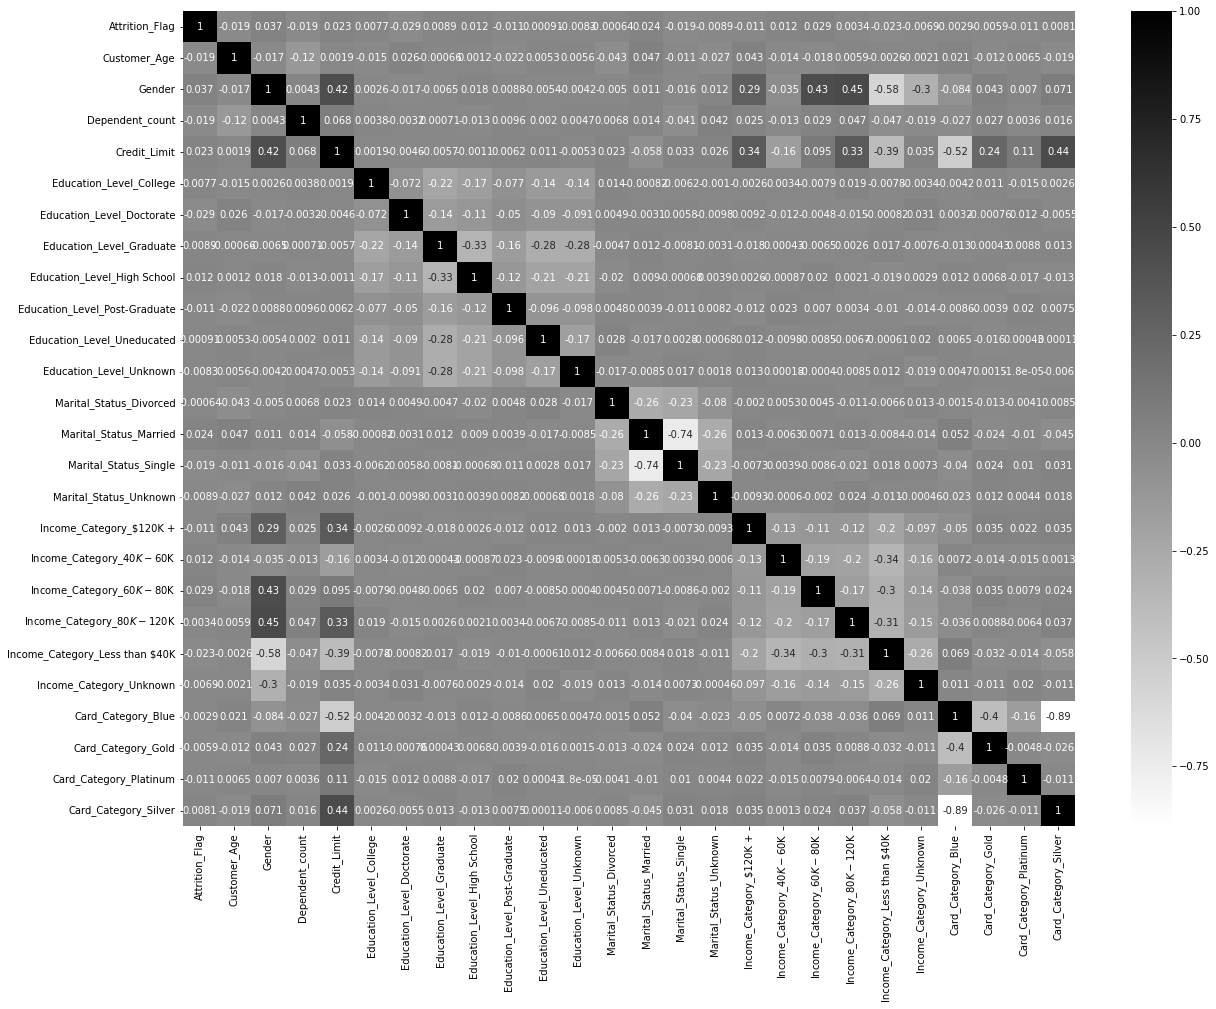

In [46]:
plt.figure(figsize=(20,15))
sns.heatmap(ohe.corr(),annot=True,cmap="gray_r")


In [58]:
x=df.drop("Attrition_Flag",axis=1)
y=df["Attrition_Flag"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [68]:
from sklearn.preprocessing import StandardScaler
le=LabelEncoder()
df["Attrition_Flag"]=le.fit_transform(df["Attrition_Flag"])
df["Gender"]=le.fit_transform(df["Gender"])
ohe=pd.get_dummies(df)
ohe


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Credit_Limit,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,1,3,12691.0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,1,49,0,5,8256.0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1,51,1,3,3418.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,40,0,4,3313.0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,1,40,1,3,4716.0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,4003.0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
10123,0,41,1,2,4277.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
10124,0,44,0,1,5409.0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
10125,0,30,1,2,5281.0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [73]:
df=ohe

In [75]:
x=df.drop("Attrition_Flag",axis=1)
y=df["Attrition_Flag"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.700,random_state=100)


In [78]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [79]:
x_train.shape



(7067, 25)

In [80]:
x_test.shape

(3030, 25)

In [81]:

dtc = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [84]:
y_pred = dtc.predict(x_test)


In [83]:
accuracy_score(y_test,y_pred)

0.8366336633663366

In [85]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.03      0.06       473
           1       0.85      0.99      0.91      2557

    accuracy                           0.84      3030
   macro avg       0.57      0.51      0.49      3030
weighted avg       0.76      0.84      0.78      3030



In [86]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.8181518151815181

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.16      0.04      0.06       473
           1       0.84      0.96      0.90      2557

    accuracy                           0.82      3030
   macro avg       0.50      0.50      0.48      3030
weighted avg       0.74      0.82      0.77      3030

